# 1일차 Review : 같은 문제 다시 풀어보기

    학습은 10번으로!

In [1]:
!pip install pydot

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
x = cancer.data
y = cancer.target

In [5]:
x.shape, y.shape

((569, 30), (569,))

In [6]:
# train / test set
# validation split
# function api

In [7]:
#####################
# 라이브러리 불러오기
#####################
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.2, random_state=2022)

In [9]:
x_train.shape, y_train.shape

((455, 30), (455,))

In [10]:
########
# 모델링 : Functional API
########
# 1번 세션 클리어
keras.backend.clear_session()

# 2번 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(30,))
ol = keras.layers.Dense(1, activation='sigmoid')(il)

# 3번 모델의 시작과 끝 지정
model = keras.models.Model(il, ol)

# 4번 컴파일
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'],
             optimizer='adam')

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [11]:
from tensorflow.keras.utils import plot_model

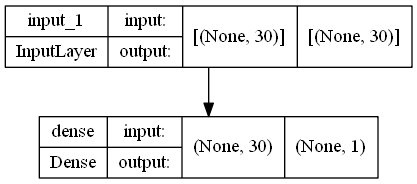

In [12]:
plot_model(model, show_shapes=True)

In [11]:
###########
# 모델 학습 : validation_split
###########

model.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 0s 9ms/step - loss: 58.6534 - accuracy: 0.6209 - val_loss: 40.5246 - val_accuracy: 0.6923
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 46.1490 - accuracy: 0.6209 - val_loss: 30.6233 - val_accuracy: 0.6923
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 33.6899 - accuracy: 0.6209 - val_loss: 20.6610 - val_accuracy: 0.6923
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 21.6148 - accuracy: 0.6209 - val_loss: 10.5693 - val_accuracy: 0.7033
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 9.7621 - accuracy: 0.6429 - val_loss: 2.2747 - val_accuracy: 0.8022
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 2.0322 - accuracy: 0.7940 - val_loss: 0.7759 - val_accuracy: 0.8242
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 1.6207 - accuracy: 0.7473 - val_loss: 1.0715 - val_accuracy: 0.7253
Epoch 8/10
1

In [12]:
###########
# 모델 예측
###########

y_pred = model.predict(x_test)

y_pred[:5].reshape(-1)

array([0.9414184 , 0.999012  , 0.9991544 , 0.9993317 , 0.99999815],
      dtype=float32)

In [13]:
y_test[:5]

array([1, 1, 0, 1, 1])

# 히든 레이어 추가하여 모델링!

    히든 레이어 2개를 추가하여 다시 모델링!
    히든 레이어 노드 수 : 32
    히든 레이어 activation = 'relu'

In [14]:
x_train.shape, y_train.shape

((455, 30), (455,))

In [17]:
########
# 모델링 : Functional API
########

# 1번 세션 클리어
keras.backend.clear_session()

# 2번 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(30,), name='Input' )
hl = keras.layers.Dense(32, activation='relu', name='H1')(il)
hl = keras.layers.Dense(32, activation='relu', name='H2')(hl)
ol = keras.layers.Dense(1, activation='sigmoid', name='Output')(hl)

# 3번 레이어의 시작과 끝 지정
model = keras.models.Model(il, ol)

# 4번 컴파일
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

# 양념
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 30)]              0         
                                                                 
 H1 (Dense)                  (None, 32)                992       
                                                                 
 H2 (Dense)                  (None, 32)                1056      
                                                                 
 Output (Dense)              (None, 1)                 33        
                                                                 
Total params: 2,081
Trainable params: 2,081
Non-trainable params: 0
_________________________________________________________________


In [18]:
from tensorflow.keras.utils import plot_model

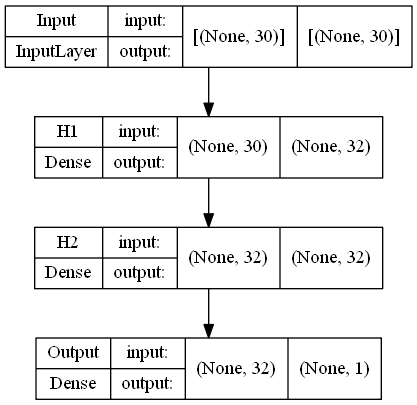

In [19]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [16]:
###########
# 모델 학습
###########

model.fit(x_train, y_train, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
12/12 [==============================] - 0s 7ms/step - loss: 16.8842 - accuracy: 0.4121 - val_loss: 10.6003 - val_accuracy: 0.3077
Epoch 2/10
12/12 [==============================] - 0s 2ms/step - loss: 5.7339 - accuracy: 0.4423 - val_loss: 3.7126 - val_accuracy: 0.2088
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 3.0494 - accuracy: 0.3901 - val_loss: 1.3517 - val_accuracy: 0.3407
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 1.2758 - accuracy: 0.5467 - val_loss: 0.9359 - val_accuracy: 0.5055
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 0.8665 - accuracy: 0.7225 - val_loss: 0.5973 - val_accuracy: 0.6703
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.7060 - val_loss: 0.3478 - val_accuracy: 0.8681
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.7692 - val_loss: 0.4164 - val_accuracy: 0.8462
Epoch 8/10
12/12 [

In [ ]:
###########
# 모델 예측
###########

